 Importing ML Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df=pd.read_csv('/content/all_tickets_processed_improved_v3.csv.zip')

In [4]:
df.sample(5)

,Document,Topic_group
42794,error sent wednesday error hi can you please h...,HR Support
21650,new purchase po thursday february pm purchase ...,Purchase
11348,add branches suppliers service caterers wednes...,Miscellaneous
6519,re team access rights re rights hi colleague n...,HR Support
30921,oracle account creation friday pm change hi ac...,Miscellaneous


In [5]:
df.shape

(47837, 2)

# Data Cleaning

In [6]:
df.isnull().sum()

,0
Document,0
Topic_group,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [9]:
df.columns=["d","t"]

In [10]:
df["t"].value_counts()

,count
t,
Hardware,13617
HR Support,10915
Access,7125
Miscellaneous,7060
Storage,2777
Purchase,2464
Internal Project,2119
Administrative rights,1760


In [11]:
for i in df["t"]:
  if i in ["Storage","Purchase","Internal Project","Administrative rights"]:
    df["t"].replace(i,"Others",inplace=True)

In [12]:
df["t"].value_counts()

,count
t,
Hardware,13617
HR Support,10915
Others,9120
Access,7125
Miscellaneous,7060


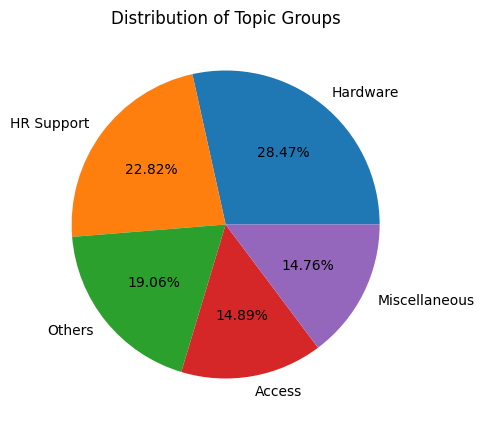

In [13]:
plt.figure(figsize=(10, 5))
plt.pie(df["t"].value_counts(),labels=["Hardware","HR Support","Others","Access","Miscellaneous"],autopct='%0.2f%%')
plt.title("Distribution of Topic Groups")
plt.show()

In [14]:
df["n_c"]=df["d"].apply(len)

In [15]:
df["n_w"]=df["d"].apply(lambda  x:len(nltk.word_tokenize(x)))

In [16]:
df["n_s"]=df["d"].apply(lambda  x:len(nltk.sent_tokenize(x)))

In [17]:
df[df["t"]=="Hardware"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,13617.000000,13617.000000,13617.0
mean,375.408240,56.427848,1.0
std,516.261347,75.605867,0.0
min,7.000000,2.000000,1.0
25%,127.000000,20.000000,1.0
50%,206.000000,32.000000,1.0
75%,392.000000,60.000000,1.0
max,7015.000000,931.000000,1.0


In [18]:
df[df["t"]=="HR Support"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,10915.000000,10915.000000,10915.0
mean,249.252313,37.855337,1.0
std,284.265475,42.341860,0.0
min,13.000000,2.000000,1.0
25%,101.000000,16.000000,1.0
50%,159.000000,24.000000,1.0
75%,267.000000,41.000000,1.0
max,5595.000000,818.000000,1.0


In [19]:
df[df["t"]=="Others"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,9120.000000,9120.000000,9120.0
mean,260.766447,38.453509,1.0
std,307.978909,45.065543,0.0
min,16.000000,2.000000,1.0
25%,114.000000,17.000000,1.0
50%,182.000000,27.000000,1.0
75%,274.000000,40.000000,1.0
max,6880.000000,982.000000,1.0


In [20]:
df[df["t"]=="Access"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,7125.000000,7125.000000,7125.0
mean,242.338667,35.678737,1.0
std,332.337841,47.271400,0.0
min,15.000000,2.000000,1.0
25%,96.000000,15.000000,1.0
50%,146.000000,22.000000,1.0
75%,253.000000,38.000000,1.0
max,6363.000000,936.000000,1.0


In [21]:
df[df["t"]=="Miscellaneous"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,7060.000000,7060.000000,7060.0
mean,286.876487,43.023938,1.0
std,357.805191,52.247302,0.0
min,7.000000,2.000000,1.0
25%,109.000000,17.000000,1.0
50%,176.000000,27.000000,1.0
75%,319.000000,48.000000,1.0
max,6912.000000,953.000000,1.0


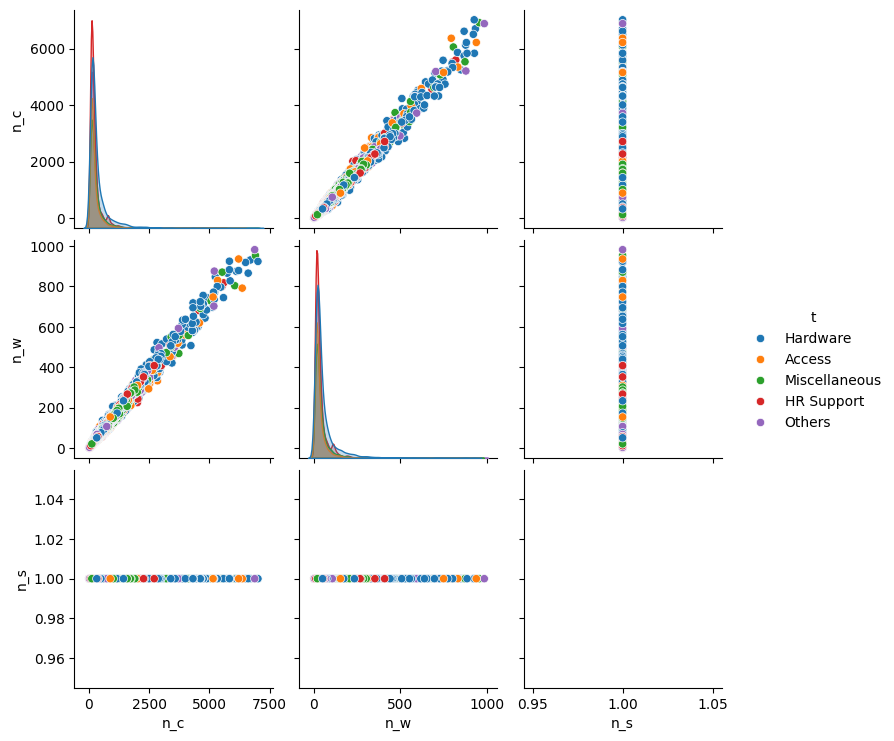

In [22]:
sns.pairplot(df,hue="t")

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Fit and transform
df['t'] = le.fit_transform(df['t'])

print(df)

                                                       d  t  n_c  n_w  n_s
0      connection with icon icon dear please setup ic...  2  111   18    1
1      work experience user work experience user hi w...  0  124   19    1
2      requesting for meeting requesting meeting hi p...  2   93   14    1
3      reset passwords for external accounts re expir...  0  948  145    1
4      mail verification warning hi has got attached ...  3  115   15    1
...                                                  ... ..  ...  ...  ...
47832  git space for a project issues with adding use...  0  889  155    1
47833  error sent july error hi guys can you help out...  3  126   22    1
47834  connection issues sent tuesday july connection...  2  398   59    1
47835  error cube reports sent tuesday july error hel...  1  372   58    1
47836  running out on extensions hello please be advi...  2  330   52    1

[47837 rows x 5 columns]


In [24]:
df[["t","n_c","n_w","n_s"]].corr()

,t,n_c,n_w,n_s
t,1.000000,0.023246,0.021691,NaN
n_c,0.023246,1.000000,0.995037,NaN
n_w,0.021691,0.995037,1.000000,NaN
n_s,NaN,NaN,NaN,NaN


<Axes: >

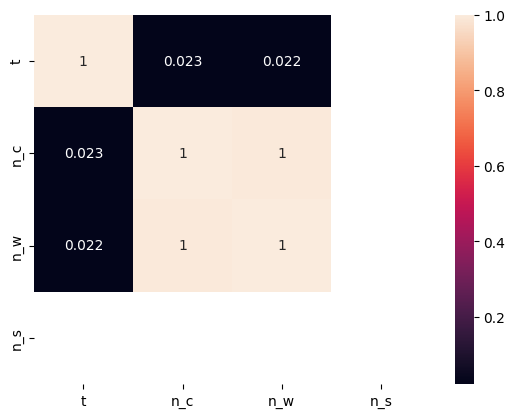

In [25]:
sns.heatmap(df[["t","n_c","n_w","n_s"]].corr(),annot=True)

**Since the multicollinearity is present, I will keep only one column i.e., n_c because of its variability wrt "t"**

In [26]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [27]:
list(stop_words)[:10]

['nor', 'while', 'hers', 'don', 'theirs', 'the', 'had', 'me', 'weren', 'both']

In [28]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)  # keeps only letters and spaces

    # 3. Tokenize
    words = nltk.word_tokenize(text)

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Remove special characters
    words = [word for word in words if word.isalnum()==1]

    # 6. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    # 7. Re-join words into a string
    return ' '.join(words)

In [29]:
for i in range(len(df)):
    df["d"][i]=preprocess_text(df["d"][i])

In [30]:
preprocess_text("hey, what is your name?")

'hey name'

In [31]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

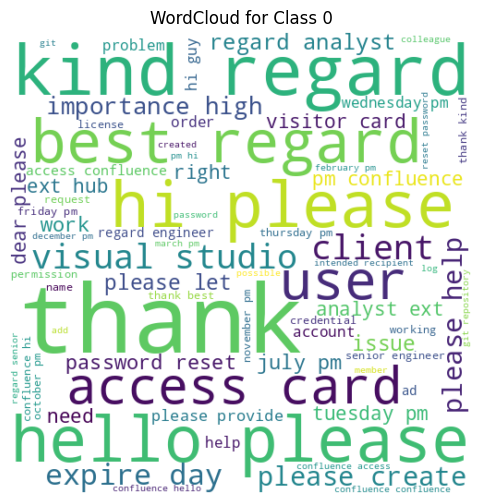

In [32]:
# Generate WordCloud from text in label/class 0
text_data = df[df["t"] == 0]["d"].str.cat(sep=" ").strip()

if text_data:  # Check that the string is not empty
    Hardware_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(6, 6))
    plt.imshow(Hardware_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud for Class 0")
    plt.show()
else:
    print("No text found for label 0.")

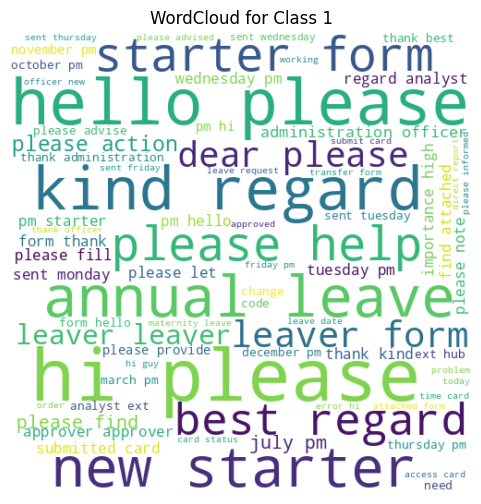

In [33]:
# Generate WordCloud from text in label/class 1
text_data = df[df["t"] == 1]["d"].str.cat(sep=" ").strip()

if text_data:  # Check that the string is not empty
    Hardware_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(6, 6))
    plt.imshow(Hardware_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud for Class 1")
    plt.show()
else:
    print("No text found for label 1.")

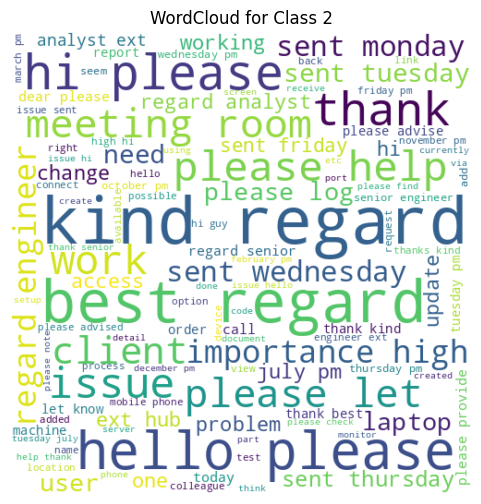

In [34]:
# Generate WordCloud from text in label/class 2
text_data = df[df["t"] == 2]["d"].str.cat(sep=" ").strip()

if text_data:  # Check that the string is not empty
    Hardware_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(6, 6))
    plt.imshow(Hardware_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud for Class 2")
    plt.show()
else:
    print("No text found for label 2.")

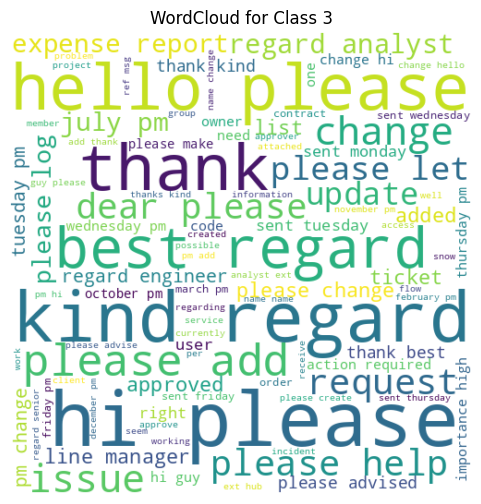

In [35]:
# Generate WordCloud from text in label/class 3
text_data = df[df["t"] == 3]["d"].str.cat(sep=" ").strip()

if text_data:  # Check that the string is not empty
    Hardware_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(6, 6))
    plt.imshow(Hardware_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud for Class 3")
    plt.show()
else:
    print("No text found for label 3.")

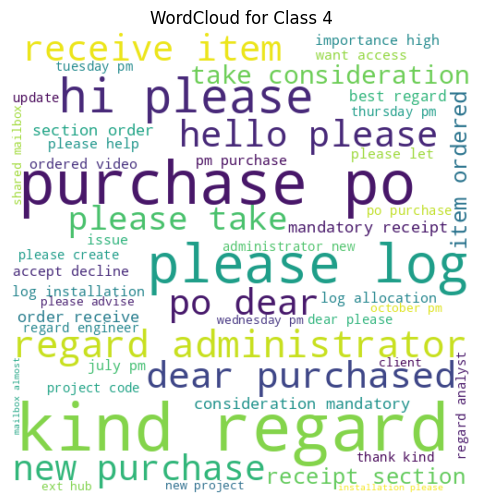

In [36]:
# Generate WordCloud from text in label/class 4
text_data = df[df["t"] == 4]["d"].str.cat(sep=" ").strip()

if text_data:  # Check that the string is not empty
    Hardware_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(6, 6))
    plt.imshow(Hardware_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud for Class 4")
    plt.show()
else:
    print("No text found for label 4.")

# **Feature Engineering**

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=300)

In [38]:
X=tfidf.fit_transform(df["d"]).toarray()

In [39]:
X.shape

(47837, 300)

In [40]:
y=df["t"].values

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.12088396,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0865716 , ..., 0.        , 0.        ,
        0.        ]])

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score,classification_report

In [44]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [45]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred1))


********************************************************
Precision : 0.6950028507912073
Recall : 0.712145283266217
F1 Score : 0.6937527449295372
********************************************************
              precision    recall  f1-score   support

           0       0.58      0.80      0.67      1455
           1       0.72      0.71      0.72      2107
           2       0.80      0.58      0.67      2760
           3       0.58      0.76      0.66      1400
           4       0.80      0.71      0.75      1846

    accuracy                           0.69      9568
   macro avg       0.70      0.71      0.69      9568
weighted avg       0.72      0.69      0.69      9568



In [47]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred1))

********************************************************
Precision : 0.8009079520167657
Recall : 0.7493757339153108
F1 Score : 0.7672283508483122
********************************************************
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1455
           1       0.76      0.76      0.76      2107
           2       0.67      0.88      0.76      2760
           3       0.79      0.70      0.74      1400
           4       0.88      0.68      0.77      1846

    accuracy                           0.77      9568
   macro avg       0.80      0.75      0.77      9568
weighted avg       0.78      0.77      0.77      9568



In [49]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred1))

********************************************************
Precision : 0.6656413667889906
Recall : 0.6513432494821655
F1 Score : 0.6434138971092619
********************************************************
              precision    recall  f1-score   support

           0       0.47      0.79      0.59      1455
           1       0.73      0.65      0.69      2107
           2       0.69      0.65      0.67      2760
           3       0.62      0.64      0.63      1400
           4       0.82      0.53      0.64      1846

    accuracy                           0.65      9568
   macro avg       0.67      0.65      0.64      9568
weighted avg       0.68      0.65      0.65      9568



In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [52]:
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [53]:
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred4))

********************************************************
Precision : 0.6656413667889906
Recall : 0.6513432494821655
F1 Score : 0.6434138971092619
********************************************************
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1455
           1       0.83      0.85      0.84      2107
           2       0.78      0.84      0.81      2760
           3       0.81      0.79      0.80      1400
           4       0.90      0.78      0.83      1846

    accuracy                           0.83      9568
   macro avg       0.84      0.83      0.83      9568
weighted avg       0.83      0.83      0.83      9568



In [55]:
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred5))

********************************************************
Precision : 0.6656413667889906
Recall : 0.6513432494821655
F1 Score : 0.6434138971092619
********************************************************
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1455
           1       0.85      0.84      0.84      2107
           2       0.76      0.85      0.80      2760
           3       0.82      0.80      0.81      1400
           4       0.88      0.79      0.84      1846

    accuracy                           0.83      9568
   macro avg       0.84      0.83      0.83      9568
weighted avg       0.83      0.83      0.83      9568



In [57]:
df

,d,t,n_c,n_w,n_s
0,connection icon icon dear please setup icon pe...,2,111,18,1
1,work experience user work experience user hi w...,0,124,19,1
2,requesting meeting requesting meeting hi pleas...,2,93,14,1
3,reset password external account expire day hi ...,0,948,145,1
4,mail verification warning hi got attached plea...,3,115,15,1
...,...,...,...,...,...
47832,git space project issue adding user sent tuesd...,0,889,155,1
47833,error sent july error hi guy help error appear...,3,126,22,1
47834,connection issue sent tuesday july connection ...,2,398,59,1
47835,error cube report sent tuesday july error hell...,1,372,58,1


In [58]:
X=tfidf.fit_transform(df["d"]).toarray()

In [59]:
X_new=pd.DataFrame(X)

In [60]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.706891,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.046769,0.0,0.062764,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.052117,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47832,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.046267,0.0,0.0,...,0.0,0.0,0.0,0.056611,0.0,0.0,0.0,0.0,0.000000,0.000000
47833,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.247947,0.0,0.0,0.0,0.0,0.000000,0.000000
47834,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.119457,0.254965
47835,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [61]:
X_new.loc[:,300]=df["n_c"]

In [62]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,111
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.706891,0.000000,124
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,93
3,0.0,0.0,0.0,0.046769,0.0,0.062764,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.052117,0.0,0.0,0.0,0.0,0.000000,0.000000,948
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47832,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.046267,0.0,0.0,...,0.0,0.0,0.056611,0.0,0.0,0.0,0.0,0.000000,0.000000,889
47833,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.247947,0.0,0.0,0.0,0.0,0.000000,0.000000,126
47834,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.119457,0.254965,398
47835,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,372


In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

# Fit and transform selected columns
X_scaled = pd.DataFrame(scaler.fit_transform(X_new), columns=X_new.columns)

In [64]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.014840
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.706891,0.000000,0.016695
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.012272
3,0.0,0.0,0.0,0.046769,0.0,0.064661,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.052117,0.0,0.0,0.0,0.0,0.000000,0.000000,0.134275
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.015411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47832,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.046267,0.0,0.0,...,0.0,0.0,0.056611,0.0,0.0,0.0,0.0,0.000000,0.000000,0.125856
47833,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.247947,0.0,0.0,0.0,0.0,0.000000,0.000000,0.016981
47834,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.119457,0.254965,0.055793
47835,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.052083


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape

(38269, 301)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [68]:
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [69]:
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred4))

********************************************************
Precision : 0.6656413667889906
Recall : 0.6513432494821655
F1 Score : 0.6434138971092619
********************************************************
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1455
           1       0.83      0.85      0.84      2107
           2       0.78      0.85      0.81      2760
           3       0.81      0.78      0.80      1400
           4       0.90      0.78      0.83      1846

    accuracy                           0.83      9568
   macro avg       0.84      0.83      0.83      9568
weighted avg       0.83      0.83      0.83      9568



In [71]:
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("********************************************************")
print("Precision :", precision_score(y_test, y_pred1, average='macro'))   # or 'micro'/'weighted'
print("Recall :", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred1, average='macro'))
print("********************************************************")
print(classification_report(y_test, y_pred5))

********************************************************
Precision : 0.6656413667889906
Recall : 0.6513432494821655
F1 Score : 0.6434138971092619
********************************************************
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1455
           1       0.84      0.84      0.84      2107
           2       0.78      0.85      0.81      2760
           3       0.81      0.80      0.81      1400
           4       0.89      0.79      0.84      1846

    accuracy                           0.83      9568
   macro avg       0.84      0.83      0.83      9568
weighted avg       0.83      0.83      0.83      9568



# **DEEP LEARNING**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
# Load data
df3 = pd.read_csv('/content/all_tickets_processed_improved_v3.csv.zip')  # Update path if needed
print(df3.head())

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df3.columns=['d1','t1']
df3['d1'] = df3['d1'].apply(clean_text)


                                            Document    Topic_group
0  connection with icon icon dear please setup ic...       Hardware
1  work experience user work experience user hi w...         Access
2  requesting for meeting requesting meeting hi p...       Hardware
3  reset passwords for external accounts re expir...         Access
4  mail verification warning hi has got attached ...  Miscellaneous


In [3]:
df3.sample(5)

,d1,t1
21747,new starter admin center wednesday february pm...,HR Support
5679,account re upgrade process how free how drive ...,Administrative rights
31365,full permissions on security groups tuesday ju...,Miscellaneous
3806,wireless access re updated wireless hello wire...,Hardware
18705,notification monthly windows updates deploymen...,Hardware


In [4]:
# Label encoding
label_encoder = LabelEncoder()
df3['label_encoded'] = label_encoder.fit_transform(df3['t1'])

# Tokenization
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df3['d1'])
sequences = tokenizer.texts_to_sequences(df3['d1'])

# Padding
maxlen = 100
X1 = pad_sequences(sequences, maxlen=maxlen)
y1 = df3['label_encoded'].values

In [5]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # auto output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    x1_train, y1_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.4933 - loss: 1.3929 - val_accuracy: 0.7784 - val_loss: 0.7005
Epoch 2/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8187 - loss: 0.5923 - val_accuracy: 0.8140 - val_loss: 0.5481
Epoch 3/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8538 - loss: 0.4777 - val_accuracy: 0.8367 - val_loss: 0.5153
Epoch 4/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8852 - loss: 0.3851 - val_accuracy: 0.8407 - val_loss: 0.5043
Epoch 5/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9003 - loss: 0.3381 - val_accuracy: 0.8433 - val_loss: 0.4863
